In [2]:
from utilities import create_complete_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# go through all speeds of pedestrians, create new dataframe with pedestrian id and relative mean speed
def create_mean_speed_df(path):
    ext_df = create_complete_dataframe(path)
    ped_ids = ext_df['ID'].unique()
    ped_mean_speeds = []
    for ped in ped_ids:
        ped_mean_speeds.append(np.mean(ext_df[ext_df['ID'] == ped]['SPEED'].to_numpy()))
    mean_speeds_df = pd.DataFrame(data={'ID': ped_ids, 'MEAN_SPEED': ped_mean_speeds})
    return mean_speeds_df

In [3]:
# create mean speed dataframe for the corridor data (15 persons)
corridor_file = "../data/Pedestrian_Trajectories/Corridor_Data/ug-180-015.txt"
mean_speeds_corridor_df = create_mean_speed_df(corridor_file)

In [4]:
# save the created dataframe
file_save = "../data/mean_speed_corridor"
mean_speeds_corridor_df.to_pickle(file_save)

In [ ]:
# create mean speed dataframe for the bottleneck data (70 persons)
bottleneck_file = "../data/Pedestrian_Trajectories/Bottleneck_Data/uo-180-070.txt"
mean_speeds_bottleneck_df = create_mean_speed_df(bottleneck_file)

In [ ]:
# save the created dataframe
file_save = "../data/mean_speed_bottleneck"
mean_speeds_bottleneck_df.to_pickle(file_save)

### GET EXTENDED DATASET, RESEMBLE FIGURE FROM PAPER

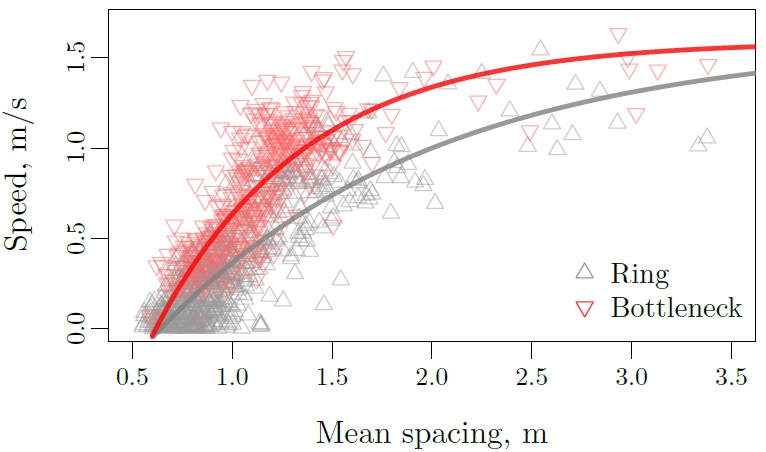

In [2]:
corridor_file = "../data/Pedestrian_Trajectories/Corridor_Data/ug-180-015.txt"
extended_corridor_df = create_complete_dataframe(corridor_file)
extended_corridor_df['MEAN_SPACING'] = extended_corridor_df['MEAN_SPACING'].astype(float)

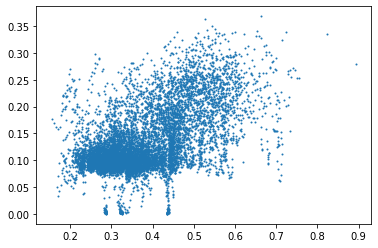

In [6]:
extended_corridor_df.to_pickle("../data/extended_corridor_df")
speed = extended_corridor_df['SPEED'].to_numpy()
mean_spacing = extended_corridor_df['MEAN_SPACING'].to_numpy()
plt.scatter(mean_spacing, speed, s=1)

In [4]:
def fd_exec(m_s, v0, T, l):
    return v0 * (1 - np.exp((l - m_s) / (v0 * T)))

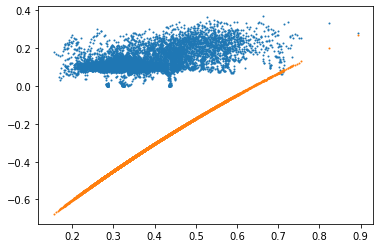

In [12]:
c_v0 = 1.6
c_T = 0.86
c_l = 0.64
mean_spacings = extended_corridor_df['MEAN_SPACING'].unique()
fd_res = []
for m_s in mean_spacings:
    fd_res.append(fd_exec(m_s, c_v0, c_T, c_l))
plt.scatter(mean_spacing, speed, s=1)
plt.scatter(mean_spacings, fd_res, s=1)
plt.show()

In [ ]:
bottleneck_file = "../data/Pedestrian_Trajectories/Bottleneck_Data/uo-180-070.txt"
extended_bottleneck_df = create_complete_dataframe(bottleneck_file)
extended_bottleneck_df['MEAN_SPACING'] = extended_bottleneck_df['MEAN_SPACING'].astype(float)

extended_corridor_df.to_pickle("../data/extended_corridor_df")
speed = extended_corridor_df['SPEED'].to_numpy()
mean_spacing = extended_corridor_df['MEAN_SPACING'].to_numpy()
plt.scatter(mean_spacing, speed, s=1)

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\asus\appdata\local\program

In [ ]:
extended_bottleneck_df.to_pickle("../data/extended_bottleneck_df")
speed = extended_bottleneck_df['SPEED'].to_numpy()
mean_spacing = extended_bottleneck_df['MEAN_SPACING'].to_numpy()
c_v0 = 1.64
c_T = 0.49
c_l = 0.61
mean_spacings = extended_bottleneck_df['MEAN_SPACING'].unique()
fd_res = []
for m_s in mean_spacings:
    fd_res.append(fd_exec(m_s, c_v0, c_T, c_l))
plt.scatter(mean_spacing, speed, s=1)
plt.scatter(mean_spacings, fd_res, s=1)
plt.show()